<a href="https://www.kaggle.com/code/shubhammisar/cat-vs-dog-alex-net-pytorch" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cats-and-dogs-image-classification
/kaggle/input/cats-and-dogs-image-classification/test
/kaggle/input/cats-and-dogs-image-classification/test/dogs
/kaggle/input/cats-and-dogs-image-classification/test/cats
/kaggle/input/cats-and-dogs-image-classification/train
/kaggle/input/cats-and-dogs-image-classification/train/dogs
/kaggle/input/cats-and-dogs-image-classification/train/cats


## Data Preparation

In [2]:
import torchvision
from torchvision.datasets import ImageFolder
import torch

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('Data/archive.zip','r')
zip_ref.extractall('Data/')
zip_ref.close ()

In [3]:
dataset = ImageFolder('/Data/train')

In [4]:
dataset.classes

['cats', 'dogs']

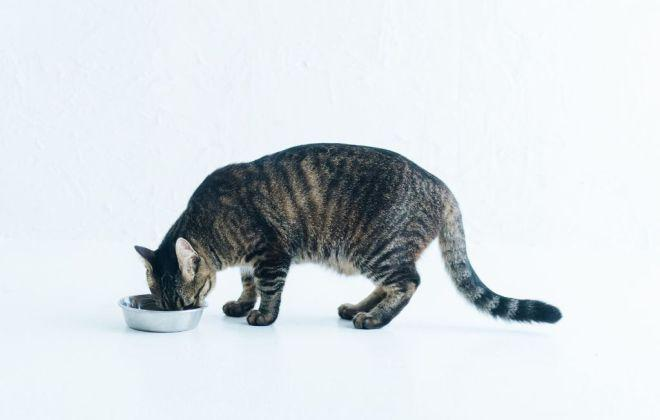

In [5]:
from IPython.display import display

display(dataset[200][0])

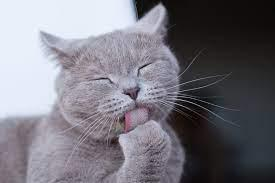

In [6]:
display(dataset[1][0])

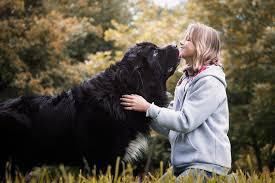

In [7]:
display(dataset[500][0])

In [8]:
len(dataset)

557

In [9]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((255,255) ),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])

In [10]:
train_dataset = ImageFolder('Data/train', transform = transform)

Calculate mean and standerd deviation to normalize the tensors

In [11]:
train_dataset[0][0].shape

torch.Size([3, 255, 255])

In [12]:
torch.mean(train_dataset[0][0],dim = (1,2))

tensor([0.5487, 0.5140, 0.4746])

In [13]:
torch.concat((train_dataset[0][0],train_dataset[1][0]), dim = 1 ).shape

torch.Size([3, 510, 255])

In [14]:
torch_concatinated = torch.concat([data[0] for data in train_dataset], dim = 1)

In [15]:
torch_concatinated.shape

torch.Size([3, 142035, 255])

In [16]:
mean = torch.mean(torch_concatinated, dim = (1,2))

In [17]:
mean

tensor([0.5875, 0.5591, 0.4995])

In [18]:
std_dev =torch.std(torch_concatinated, dim = (1,2))

In [19]:
additional_transform = transforms.Compose([
    transforms.Normalize(mean, std_dev)
])

train_dataset.transform.transforms.append(additional_transform)

In [20]:
train_dataset[0][0]

tensor([[[ 0.6792,  0.6657,  0.6657,  ...,  0.5710,  0.5439,  0.5304],
         [ 0.6386,  0.6657,  0.6928,  ...,  0.5845,  0.5710,  0.5710],
         [ 0.6251,  0.6792,  0.7198,  ...,  0.5980,  0.5845,  0.5980],
         ...,
         [ 0.1108,  0.2055,  0.1785,  ...,  0.2597,  0.2597,  0.2867],
         [ 0.1108,  0.2326,  0.1920,  ...,  0.2055,  0.2191,  0.3003],
         [ 0.0837,  0.2055,  0.1785,  ...,  0.2326,  0.2191,  0.3003]],

        [[ 0.8385,  0.8249,  0.8249,  ...,  0.6611,  0.6474,  0.6201],
         [ 0.7976,  0.8249,  0.8522,  ...,  0.6338,  0.6338,  0.6201],
         [ 0.7839,  0.8385,  0.8795,  ...,  0.6065,  0.6065,  0.6201],
         ...,
         [-0.2671, -0.1716, -0.2125,  ...,  0.4836,  0.4836,  0.5109],
         [-0.2671, -0.1443, -0.1989,  ...,  0.4290,  0.4427,  0.5246],
         [-0.2944, -0.1716, -0.2262,  ...,  0.4563,  0.4427,  0.5246]],

        [[ 1.0115,  0.9988,  0.9988,  ...,  0.8083,  0.7829,  0.7702],
         [ 0.9734,  0.9988,  1.0242,  ...,  0

In [21]:
import matplotlib.pyplot as plt

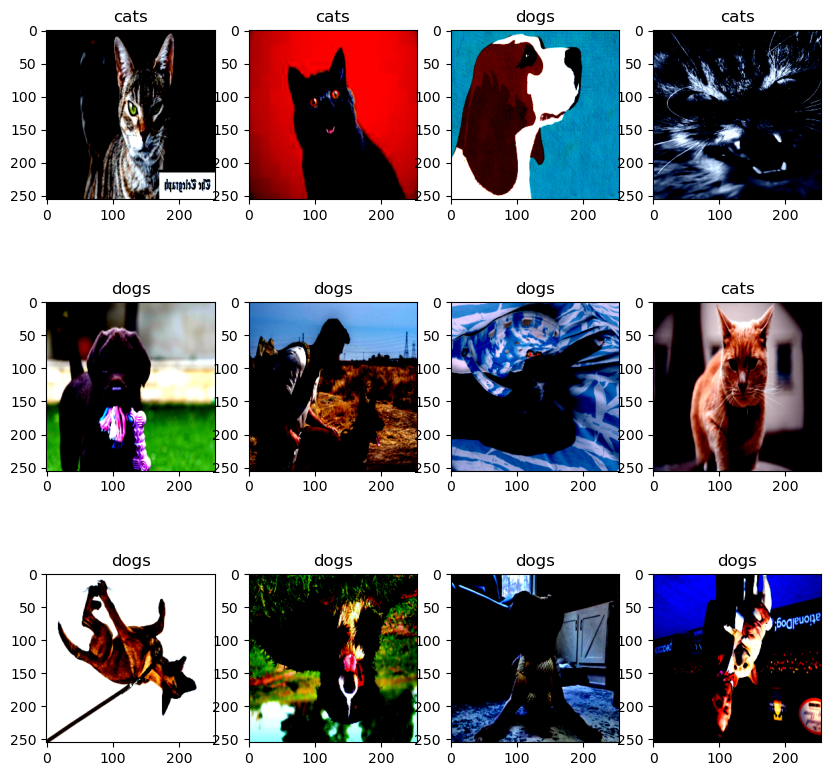

In [22]:
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns * rows + 1):
    idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[idx]
    class_name = train_dataset.classes[label]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

Create DataLoader

In [23]:
test_dataset = ImageFolder('Data/test', transform = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor()
    ,additional_transform
]))

In [24]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: /kaggle/input/cats-and-dogs-image-classification/test
    StandardTransform
Transform: Compose(
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Compose(
               Normalize(mean=tensor([0.5875, 0.5591, 0.4995]), std=tensor([0.2898, 0.2873, 0.3087]))
           )
           )

In [25]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=2)

## Defining Model Architecure

In [26]:
import torch.nn as nn


In [27]:
 class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(96),
            
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256),
            
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


## Setting up hypterparameters 

In [28]:
model = AlexNet(2)


In [29]:
from tqdm import tqdm
import torch.nn.parallel as parallel

In [30]:
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = parallel.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Using 2 GPUs!


DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): ReLU(inplace=True)
      (13): BatchNorm2d(384, eps=1e-05, momentum=0.1,

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =  0.0001)


## Training

In [32]:
# Training loop
train_accuracies = []
test_accuracies = []
num_epochs = 100
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train
    
    train_accuracies.append(train_accuracy)
    # Evaluation (Test)
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate test accuracy and loss
    test_accuracy = correct_test / total_test
    test_loss = test_loss / total_test
    
    test_accuracies.append(test_accuracy)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.4f}")


100%|██████████| 140/140 [00:24<00:00,  5.62it/s]


Epoch 1/100 - Train Loss: 0.6986 - Train Acc: 0.4973 - Test Loss: 0.6930 - Test Acc: 0.4857


100%|██████████| 140/140 [00:11<00:00, 12.03it/s]


Epoch 2/100 - Train Loss: 0.6958 - Train Acc: 0.4991 - Test Loss: 0.6898 - Test Acc: 0.5214


100%|██████████| 140/140 [00:10<00:00, 13.18it/s]


Epoch 3/100 - Train Loss: 0.6912 - Train Acc: 0.5368 - Test Loss: 0.6895 - Test Acc: 0.5000


100%|██████████| 140/140 [00:11<00:00, 12.67it/s]


Epoch 4/100 - Train Loss: 0.6909 - Train Acc: 0.5296 - Test Loss: 0.6883 - Test Acc: 0.5143


100%|██████████| 140/140 [00:10<00:00, 13.09it/s]


Epoch 5/100 - Train Loss: 0.6913 - Train Acc: 0.5440 - Test Loss: 0.6881 - Test Acc: 0.5286


100%|██████████| 140/140 [00:10<00:00, 13.24it/s]


Epoch 6/100 - Train Loss: 0.6849 - Train Acc: 0.5368 - Test Loss: 0.6866 - Test Acc: 0.5286


100%|██████████| 140/140 [00:11<00:00, 12.54it/s]


Epoch 7/100 - Train Loss: 0.6785 - Train Acc: 0.5907 - Test Loss: 0.6837 - Test Acc: 0.5500


100%|██████████| 140/140 [00:10<00:00, 13.20it/s]


Epoch 8/100 - Train Loss: 0.6847 - Train Acc: 0.5476 - Test Loss: 0.6833 - Test Acc: 0.5357


100%|██████████| 140/140 [00:11<00:00, 12.35it/s]


Epoch 9/100 - Train Loss: 0.6804 - Train Acc: 0.5655 - Test Loss: 0.6803 - Test Acc: 0.5643


100%|██████████| 140/140 [00:10<00:00, 13.25it/s]


Epoch 10/100 - Train Loss: 0.6720 - Train Acc: 0.6302 - Test Loss: 0.6805 - Test Acc: 0.5571


100%|██████████| 140/140 [00:10<00:00, 13.13it/s]


Epoch 11/100 - Train Loss: 0.6716 - Train Acc: 0.6122 - Test Loss: 0.6782 - Test Acc: 0.5429


100%|██████████| 140/140 [00:11<00:00, 12.43it/s]


Epoch 12/100 - Train Loss: 0.6706 - Train Acc: 0.5907 - Test Loss: 0.6784 - Test Acc: 0.5429


100%|██████████| 140/140 [00:10<00:00, 13.14it/s]


Epoch 13/100 - Train Loss: 0.6712 - Train Acc: 0.5925 - Test Loss: 0.6774 - Test Acc: 0.5786


100%|██████████| 140/140 [00:11<00:00, 12.22it/s]


Epoch 14/100 - Train Loss: 0.6684 - Train Acc: 0.6122 - Test Loss: 0.6770 - Test Acc: 0.5786


100%|██████████| 140/140 [00:11<00:00, 12.16it/s]


Epoch 15/100 - Train Loss: 0.6656 - Train Acc: 0.6140 - Test Loss: 0.6769 - Test Acc: 0.5786


100%|██████████| 140/140 [00:11<00:00, 12.68it/s]


Epoch 16/100 - Train Loss: 0.6593 - Train Acc: 0.6391 - Test Loss: 0.6760 - Test Acc: 0.5643


100%|██████████| 140/140 [00:11<00:00, 12.45it/s]


Epoch 17/100 - Train Loss: 0.6651 - Train Acc: 0.6391 - Test Loss: 0.6744 - Test Acc: 0.5571


100%|██████████| 140/140 [00:10<00:00, 12.90it/s]


Epoch 18/100 - Train Loss: 0.6599 - Train Acc: 0.6373 - Test Loss: 0.6748 - Test Acc: 0.5857


100%|██████████| 140/140 [00:11<00:00, 12.48it/s]


Epoch 19/100 - Train Loss: 0.6569 - Train Acc: 0.6589 - Test Loss: 0.6711 - Test Acc: 0.5857


100%|██████████| 140/140 [00:10<00:00, 12.86it/s]


Epoch 20/100 - Train Loss: 0.6541 - Train Acc: 0.6589 - Test Loss: 0.6772 - Test Acc: 0.5643


100%|██████████| 140/140 [00:11<00:00, 12.30it/s]


Epoch 21/100 - Train Loss: 0.6599 - Train Acc: 0.6266 - Test Loss: 0.6750 - Test Acc: 0.6000


100%|██████████| 140/140 [00:10<00:00, 13.31it/s]


Epoch 22/100 - Train Loss: 0.6534 - Train Acc: 0.6409 - Test Loss: 0.6726 - Test Acc: 0.5357


100%|██████████| 140/140 [00:10<00:00, 12.97it/s]


Epoch 23/100 - Train Loss: 0.6512 - Train Acc: 0.6517 - Test Loss: 0.6753 - Test Acc: 0.5857


100%|██████████| 140/140 [00:11<00:00, 12.50it/s]


Epoch 24/100 - Train Loss: 0.6538 - Train Acc: 0.6212 - Test Loss: 0.6698 - Test Acc: 0.5929


100%|██████████| 140/140 [00:10<00:00, 13.14it/s]


Epoch 25/100 - Train Loss: 0.6490 - Train Acc: 0.6427 - Test Loss: 0.6706 - Test Acc: 0.5857


100%|██████████| 140/140 [00:11<00:00, 12.41it/s]


Epoch 26/100 - Train Loss: 0.6526 - Train Acc: 0.6338 - Test Loss: 0.6670 - Test Acc: 0.5929


100%|██████████| 140/140 [00:10<00:00, 13.04it/s]


Epoch 27/100 - Train Loss: 0.6540 - Train Acc: 0.6176 - Test Loss: 0.6656 - Test Acc: 0.5929


100%|██████████| 140/140 [00:10<00:00, 13.06it/s]


Epoch 28/100 - Train Loss: 0.6409 - Train Acc: 0.6427 - Test Loss: 0.6674 - Test Acc: 0.6000


100%|██████████| 140/140 [00:10<00:00, 12.76it/s]


Epoch 29/100 - Train Loss: 0.6395 - Train Acc: 0.6732 - Test Loss: 0.6663 - Test Acc: 0.5857


100%|██████████| 140/140 [00:10<00:00, 13.20it/s]


Epoch 30/100 - Train Loss: 0.6410 - Train Acc: 0.6858 - Test Loss: 0.6642 - Test Acc: 0.5929


100%|██████████| 140/140 [00:11<00:00, 12.44it/s]


Epoch 31/100 - Train Loss: 0.6363 - Train Acc: 0.6625 - Test Loss: 0.6646 - Test Acc: 0.6000


100%|██████████| 140/140 [00:10<00:00, 12.87it/s]


Epoch 32/100 - Train Loss: 0.6279 - Train Acc: 0.6715 - Test Loss: 0.6674 - Test Acc: 0.6000


100%|██████████| 140/140 [00:10<00:00, 13.19it/s]


Epoch 33/100 - Train Loss: 0.6401 - Train Acc: 0.6589 - Test Loss: 0.6733 - Test Acc: 0.5929


100%|██████████| 140/140 [00:10<00:00, 12.88it/s]


Epoch 34/100 - Train Loss: 0.6224 - Train Acc: 0.6750 - Test Loss: 0.6639 - Test Acc: 0.5857


100%|██████████| 140/140 [00:10<00:00, 13.16it/s]


Epoch 35/100 - Train Loss: 0.6188 - Train Acc: 0.6948 - Test Loss: 0.6571 - Test Acc: 0.6071


100%|██████████| 140/140 [00:11<00:00, 12.12it/s]


Epoch 36/100 - Train Loss: 0.6193 - Train Acc: 0.6894 - Test Loss: 0.6599 - Test Acc: 0.6143


100%|██████████| 140/140 [00:10<00:00, 13.11it/s]


Epoch 37/100 - Train Loss: 0.6125 - Train Acc: 0.6966 - Test Loss: 0.6604 - Test Acc: 0.6071


100%|██████████| 140/140 [00:11<00:00, 12.49it/s]


Epoch 38/100 - Train Loss: 0.6165 - Train Acc: 0.6804 - Test Loss: 0.6564 - Test Acc: 0.6357


100%|██████████| 140/140 [00:10<00:00, 12.77it/s]


Epoch 39/100 - Train Loss: 0.6039 - Train Acc: 0.7074 - Test Loss: 0.6533 - Test Acc: 0.6071


100%|██████████| 140/140 [00:10<00:00, 13.34it/s]


Epoch 40/100 - Train Loss: 0.6069 - Train Acc: 0.6966 - Test Loss: 0.6553 - Test Acc: 0.6214


100%|██████████| 140/140 [00:11<00:00, 12.31it/s]


Epoch 41/100 - Train Loss: 0.6001 - Train Acc: 0.6966 - Test Loss: 0.6569 - Test Acc: 0.6214


100%|██████████| 140/140 [00:10<00:00, 13.22it/s]


Epoch 42/100 - Train Loss: 0.6224 - Train Acc: 0.6589 - Test Loss: 0.6556 - Test Acc: 0.6071


100%|██████████| 140/140 [00:11<00:00, 12.25it/s]


Epoch 43/100 - Train Loss: 0.6134 - Train Acc: 0.6768 - Test Loss: 0.6501 - Test Acc: 0.6429


100%|██████████| 140/140 [00:10<00:00, 13.29it/s]


Epoch 44/100 - Train Loss: 0.5986 - Train Acc: 0.7217 - Test Loss: 0.6515 - Test Acc: 0.5929


100%|██████████| 140/140 [00:10<00:00, 13.31it/s]


Epoch 45/100 - Train Loss: 0.5934 - Train Acc: 0.6966 - Test Loss: 0.6488 - Test Acc: 0.6214


100%|██████████| 140/140 [00:10<00:00, 12.86it/s]


Epoch 46/100 - Train Loss: 0.6003 - Train Acc: 0.7092 - Test Loss: 0.6470 - Test Acc: 0.6357


100%|██████████| 140/140 [00:10<00:00, 13.47it/s]


Epoch 47/100 - Train Loss: 0.6003 - Train Acc: 0.6984 - Test Loss: 0.6490 - Test Acc: 0.6500


100%|██████████| 140/140 [00:11<00:00, 12.15it/s]


Epoch 48/100 - Train Loss: 0.5934 - Train Acc: 0.6858 - Test Loss: 0.6539 - Test Acc: 0.6571


100%|██████████| 140/140 [00:10<00:00, 13.05it/s]


Epoch 49/100 - Train Loss: 0.6003 - Train Acc: 0.6876 - Test Loss: 0.6517 - Test Acc: 0.6643


100%|██████████| 140/140 [00:11<00:00, 12.29it/s]


Epoch 50/100 - Train Loss: 0.5689 - Train Acc: 0.7469 - Test Loss: 0.6512 - Test Acc: 0.6571


100%|██████████| 140/140 [00:10<00:00, 13.02it/s]


Epoch 51/100 - Train Loss: 0.5859 - Train Acc: 0.7074 - Test Loss: 0.6456 - Test Acc: 0.6214


100%|██████████| 140/140 [00:10<00:00, 13.17it/s]


Epoch 52/100 - Train Loss: 0.5797 - Train Acc: 0.7092 - Test Loss: 0.6422 - Test Acc: 0.6786


100%|██████████| 140/140 [00:11<00:00, 12.07it/s]


Epoch 53/100 - Train Loss: 0.5682 - Train Acc: 0.7181 - Test Loss: 0.6390 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 13.19it/s]


Epoch 54/100 - Train Loss: 0.5683 - Train Acc: 0.7217 - Test Loss: 0.6474 - Test Acc: 0.6714


100%|██████████| 140/140 [00:11<00:00, 12.11it/s]


Epoch 55/100 - Train Loss: 0.5785 - Train Acc: 0.7127 - Test Loss: 0.6363 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 13.21it/s]


Epoch 56/100 - Train Loss: 0.5715 - Train Acc: 0.7217 - Test Loss: 0.6464 - Test Acc: 0.6500


100%|██████████| 140/140 [00:10<00:00, 13.01it/s]


Epoch 57/100 - Train Loss: 0.5693 - Train Acc: 0.7127 - Test Loss: 0.6391 - Test Acc: 0.6714


100%|██████████| 140/140 [00:11<00:00, 12.38it/s]


Epoch 58/100 - Train Loss: 0.5497 - Train Acc: 0.7522 - Test Loss: 0.6444 - Test Acc: 0.6143


100%|██████████| 140/140 [00:10<00:00, 13.11it/s]


Epoch 59/100 - Train Loss: 0.5711 - Train Acc: 0.7074 - Test Loss: 0.6388 - Test Acc: 0.6571


100%|██████████| 140/140 [00:11<00:00, 12.19it/s]


Epoch 60/100 - Train Loss: 0.5519 - Train Acc: 0.7325 - Test Loss: 0.6423 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 13.16it/s]


Epoch 61/100 - Train Loss: 0.5635 - Train Acc: 0.7038 - Test Loss: 0.6415 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 12.93it/s]


Epoch 62/100 - Train Loss: 0.5433 - Train Acc: 0.7361 - Test Loss: 0.6436 - Test Acc: 0.6429


100%|██████████| 140/140 [00:10<00:00, 13.36it/s]


Epoch 63/100 - Train Loss: 0.5454 - Train Acc: 0.7343 - Test Loss: 0.6404 - Test Acc: 0.6429


100%|██████████| 140/140 [00:10<00:00, 13.14it/s]


Epoch 64/100 - Train Loss: 0.5315 - Train Acc: 0.7451 - Test Loss: 0.6380 - Test Acc: 0.6786


100%|██████████| 140/140 [00:11<00:00, 12.50it/s]


Epoch 65/100 - Train Loss: 0.5286 - Train Acc: 0.7828 - Test Loss: 0.6350 - Test Acc: 0.6643


100%|██████████| 140/140 [00:10<00:00, 13.19it/s]


Epoch 66/100 - Train Loss: 0.5355 - Train Acc: 0.7469 - Test Loss: 0.6399 - Test Acc: 0.6571


100%|██████████| 140/140 [00:11<00:00, 12.16it/s]


Epoch 67/100 - Train Loss: 0.5198 - Train Acc: 0.7487 - Test Loss: 0.6425 - Test Acc: 0.6857


100%|██████████| 140/140 [00:10<00:00, 13.16it/s]


Epoch 68/100 - Train Loss: 0.5280 - Train Acc: 0.7487 - Test Loss: 0.6502 - Test Acc: 0.6643


100%|██████████| 140/140 [00:10<00:00, 12.90it/s]


Epoch 69/100 - Train Loss: 0.5315 - Train Acc: 0.7361 - Test Loss: 0.6410 - Test Acc: 0.6214


100%|██████████| 140/140 [00:11<00:00, 12.35it/s]


Epoch 70/100 - Train Loss: 0.5200 - Train Acc: 0.7451 - Test Loss: 0.6343 - Test Acc: 0.7071


100%|██████████| 140/140 [00:10<00:00, 13.30it/s]


Epoch 71/100 - Train Loss: 0.5458 - Train Acc: 0.7271 - Test Loss: 0.6388 - Test Acc: 0.6643


100%|██████████| 140/140 [00:11<00:00, 12.06it/s]


Epoch 72/100 - Train Loss: 0.5066 - Train Acc: 0.7540 - Test Loss: 0.6282 - Test Acc: 0.6929


100%|██████████| 140/140 [00:10<00:00, 13.22it/s]


Epoch 73/100 - Train Loss: 0.5268 - Train Acc: 0.7487 - Test Loss: 0.6410 - Test Acc: 0.6786


100%|██████████| 140/140 [00:10<00:00, 12.93it/s]


Epoch 74/100 - Train Loss: 0.5170 - Train Acc: 0.7828 - Test Loss: 0.6297 - Test Acc: 0.6786


100%|██████████| 140/140 [00:11<00:00, 12.68it/s]


Epoch 75/100 - Train Loss: 0.5225 - Train Acc: 0.7487 - Test Loss: 0.6450 - Test Acc: 0.6571


100%|██████████| 140/140 [00:10<00:00, 12.83it/s]


Epoch 76/100 - Train Loss: 0.5060 - Train Acc: 0.7487 - Test Loss: 0.6606 - Test Acc: 0.6857


100%|██████████| 140/140 [00:11<00:00, 12.58it/s]


Epoch 77/100 - Train Loss: 0.5040 - Train Acc: 0.7648 - Test Loss: 0.6289 - Test Acc: 0.6857


100%|██████████| 140/140 [00:10<00:00, 13.03it/s]


Epoch 78/100 - Train Loss: 0.4959 - Train Acc: 0.7684 - Test Loss: 0.6357 - Test Acc: 0.6643


100%|██████████| 140/140 [00:11<00:00, 12.47it/s]


Epoch 79/100 - Train Loss: 0.4925 - Train Acc: 0.7774 - Test Loss: 0.6333 - Test Acc: 0.6429


100%|██████████| 140/140 [00:10<00:00, 13.11it/s]


Epoch 80/100 - Train Loss: 0.4954 - Train Acc: 0.7666 - Test Loss: 0.6359 - Test Acc: 0.6286


100%|██████████| 140/140 [00:10<00:00, 12.79it/s]


Epoch 81/100 - Train Loss: 0.4901 - Train Acc: 0.7846 - Test Loss: 0.6581 - Test Acc: 0.7000


100%|██████████| 140/140 [00:11<00:00, 12.60it/s]


Epoch 82/100 - Train Loss: 0.4909 - Train Acc: 0.7810 - Test Loss: 0.6456 - Test Acc: 0.6786


100%|██████████| 140/140 [00:10<00:00, 12.99it/s]


Epoch 83/100 - Train Loss: 0.4752 - Train Acc: 0.8007 - Test Loss: 0.6259 - Test Acc: 0.6714


100%|██████████| 140/140 [00:11<00:00, 12.49it/s]


Epoch 84/100 - Train Loss: 0.4930 - Train Acc: 0.7558 - Test Loss: 0.6450 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 12.99it/s]


Epoch 85/100 - Train Loss: 0.4782 - Train Acc: 0.7702 - Test Loss: 0.6538 - Test Acc: 0.7000


100%|██████████| 140/140 [00:10<00:00, 12.99it/s]


Epoch 86/100 - Train Loss: 0.4757 - Train Acc: 0.7846 - Test Loss: 0.6439 - Test Acc: 0.6643


100%|██████████| 140/140 [00:11<00:00, 12.20it/s]


Epoch 87/100 - Train Loss: 0.4699 - Train Acc: 0.7738 - Test Loss: 0.6367 - Test Acc: 0.6643


100%|██████████| 140/140 [00:10<00:00, 12.77it/s]


Epoch 88/100 - Train Loss: 0.4621 - Train Acc: 0.8043 - Test Loss: 0.6385 - Test Acc: 0.6500


100%|██████████| 140/140 [00:11<00:00, 12.49it/s]


Epoch 89/100 - Train Loss: 0.4688 - Train Acc: 0.7917 - Test Loss: 0.6530 - Test Acc: 0.7071


100%|██████████| 140/140 [00:10<00:00, 12.97it/s]


Epoch 90/100 - Train Loss: 0.4616 - Train Acc: 0.7989 - Test Loss: 0.6596 - Test Acc: 0.6786


100%|██████████| 140/140 [00:11<00:00, 12.71it/s]


Epoch 91/100 - Train Loss: 0.4580 - Train Acc: 0.7899 - Test Loss: 0.6787 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 13.19it/s]


Epoch 92/100 - Train Loss: 0.4593 - Train Acc: 0.7882 - Test Loss: 0.6569 - Test Acc: 0.6929


100%|██████████| 140/140 [00:10<00:00, 12.95it/s]


Epoch 93/100 - Train Loss: 0.4736 - Train Acc: 0.7720 - Test Loss: 0.6277 - Test Acc: 0.6500


100%|██████████| 140/140 [00:11<00:00, 12.40it/s]


Epoch 94/100 - Train Loss: 0.4659 - Train Acc: 0.7846 - Test Loss: 0.6459 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 12.77it/s]


Epoch 95/100 - Train Loss: 0.4543 - Train Acc: 0.7935 - Test Loss: 0.6458 - Test Acc: 0.6929


100%|██████████| 140/140 [00:11<00:00, 12.45it/s]


Epoch 96/100 - Train Loss: 0.4512 - Train Acc: 0.8133 - Test Loss: 0.6299 - Test Acc: 0.6929


100%|██████████| 140/140 [00:10<00:00, 13.18it/s]


Epoch 97/100 - Train Loss: 0.4414 - Train Acc: 0.8007 - Test Loss: 0.6307 - Test Acc: 0.6643


100%|██████████| 140/140 [00:10<00:00, 12.89it/s]


Epoch 98/100 - Train Loss: 0.4403 - Train Acc: 0.7846 - Test Loss: 0.6334 - Test Acc: 0.6714


100%|██████████| 140/140 [00:11<00:00, 12.54it/s]


Epoch 99/100 - Train Loss: 0.4543 - Train Acc: 0.7810 - Test Loss: 0.6351 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 12.83it/s]


Epoch 100/100 - Train Loss: 0.4348 - Train Acc: 0.8133 - Test Loss: 0.6339 - Test Acc: 0.7000


## Results

In [33]:
import seaborn as sns

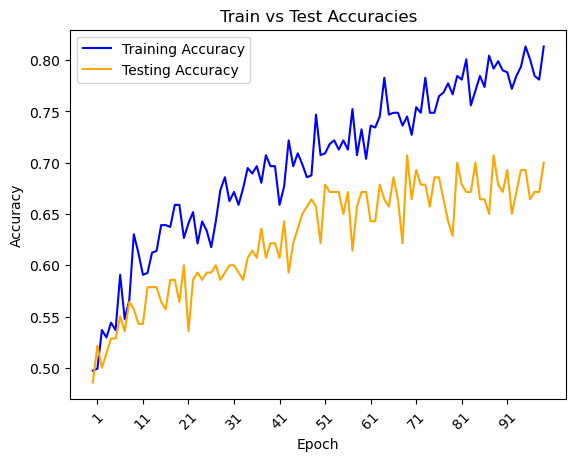

In [34]:
sns.lineplot(x = range(100), y = train_accuracies, color = "blue", label = "Training Accuracy")
sns.lineplot(x = range(100), y = test_accuracies, color = "orange", label = "Testing Accuracy")
plt.title("Train vs Test Accuracies")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(1,100,10), rotation = 45)
plt.yticks(label = range(1,100,15))
plt.legend()
plt.show()

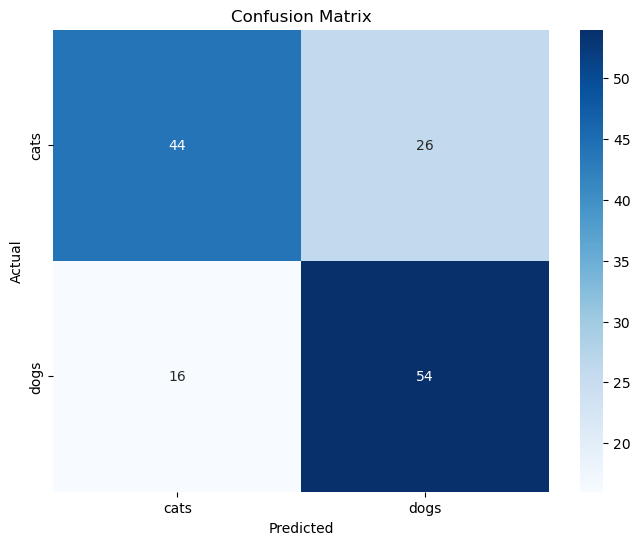

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_targets, all_predictions)
labels = dataset.classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
